In [26]:
#! pip install opencv-python
#! pip install patchify

In [27]:
import cv2      # OpenCV library for computer vision
import json     # To work with json files
import random as rnd
import copy
import sys
from patchify import patchify       # To patch the images
from tqdm import tqdm
import numpy as np

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'figure.max_open_warning': 0})

# Working with directories
from glob import glob
import os

import pandas as pd


In [28]:
# Folders locations
DATA_ROOT = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train"
MASK_ROOT = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Mask"
SAVE_ROOT = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Sat_Img"
RAW_DATASET_FOLDER = f"{DATA_ROOT}"
GROUND_TRUTH_FEATURES_FILENAME = f"{DATA_ROOT}/low_resolution_train.json"

In [29]:
def read_image_filenames(path):
    extensions = ["*.png", "*.tiff", "*.jpeg", "*.jpg"]
    image_filenames = []
    for ext in extensions:
        image_filenames.extend(glob(os.path.join(path, ext)))
    return image_filenames

original_image_filenames = read_image_filenames(RAW_DATASET_FOLDER)

original_image_filenames[:10]

['C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train\\ang20190922t192642-2_r4578_c217-plume.png',
 'C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train\\ang20190922t192642-4_r4928_c373-plume.png',
 'C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train\\ang20190922t192642-5_r6423_c113-plume.png',
 'C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train\\ang20190922t192642-A_r3270_c384-plume.png',
 'C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train\\ang20190922t192642-B_r4034_c360-plume.png',
 'C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train\\ang20190922t192642-C_r4834_c257-plume.png',
 'C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train\\ang20190922t192642_ang20190922t192642-2_r4578_c217-plume.png',
 'C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train\\ang20190922t192642_ang20190922t192642-4_r4928_c373-plume.png',
 'C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train\\ang20190922t192642_ang20190922t192

In [30]:
# Read the image
def read_image(image_filename):
    image = cv2.imread(image_filename)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(217, 217, 3)


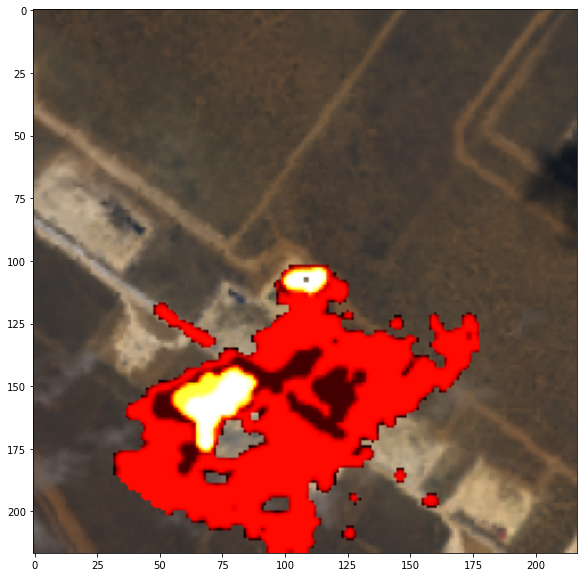

In [31]:
fil = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train/ang20190922t192642_ang20190922t192642-2_r4578_c217-plume.png"

img = read_image(fil)
print(img.shape)
plt.figure(figsize = (13,10))
plt.imshow(img, cmap = "gray");

In [32]:
res = os.listdir(RAW_DATASET_FOLDER)

In [33]:
df_img = pd.DataFrame (res, columns = ['FileName'])

In [34]:
df_img

,FileName
0,ang20190922t192642-2_r4578_c217-plume.png
1,ang20190922t192642-4_r4928_c373-plume.png
2,ang20190922t192642-5_r6423_c113-plume.png
3,ang20190922t192642-A_r3270_c384-plume.png
4,ang20190922t192642-B_r4034_c360-plume.png
...,...
3758,GAO20191103t185130p0000-B_r6754_c252-plume.png
3759,GAO20191103t190631p0000-A_r4957_c3053-plume.png
3760,GAO20191103t190631p0000-B_r5030_c3001-plume.png
3761,GAO20191103t190631p0000-C_r7026_c574-plume.png


In [35]:
#df_img[['name','split1', 'split2']] = df_img['FileName'].str.split('_',expand=True)
#df_img
df_img['FileName2'] = [x.split('_')[-0] for x in df_img['FileName']]

In [36]:
df_img

,FileName,FileName2
0,ang20190922t192642-2_r4578_c217-plume.png,ang20190922t192642-2
1,ang20190922t192642-4_r4928_c373-plume.png,ang20190922t192642-4
2,ang20190922t192642-5_r6423_c113-plume.png,ang20190922t192642-5
3,ang20190922t192642-A_r3270_c384-plume.png,ang20190922t192642-A
4,ang20190922t192642-B_r4034_c360-plume.png,ang20190922t192642-B
...,...,...
3758,GAO20191103t185130p0000-B_r6754_c252-plume.png,GAO20191103t185130p0000-B
3759,GAO20191103t190631p0000-A_r4957_c3053-plume.png,GAO20191103t190631p0000-A
3760,GAO20191103t190631p0000-B_r5030_c3001-plume.png,GAO20191103t190631p0000-B
3761,GAO20191103t190631p0000-C_r7026_c574-plume.png,GAO20191103t190631p0000-C


In [37]:
dir_name = r'C:\Users\vasan\OneDrive\EmissionsDatathon\Zeroing Methane Emissions - Dataset'
filename_suffix = 'csv'

In [38]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
df = pd.read_csv("permian_plume_list_2019 Jeremy Zhao.csv", thousands=',', skiprows = skiprows)
#df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
df.head()

,Unnamed: 0,source_id,plume_lat,plume_lon,candidate_id,date,time,qplume,sigma_qplume,active_flair_detected,inactive_flair_detected
0,0,P00001,32.212063,-103.697076,ang20190922t192642-2,2019-09-22,19:26:42,2579.528100,902.732655,False,False
1,1,P00002,32.200072,-103.673301,ang20190922t192642-4,2019-09-22,19:26:42,420.725207,147.155782,False,False
2,2,P00003,32.116008,-103.626345,ang20190922t192642-5,2019-09-22,19:26:42,1051.909600,339.267587,False,False
3,3,P00004,32.322594,-103.816072,ang20190922t194340-1,2019-09-22,19:43:40,1736.644250,1035.427670,False,False
4,4,P00005,32.284083,-103.793989,ang20190922t194340-2,2019-09-22,19:43:40,870.605019,435.968147,False,False


In [39]:
#References
#https://www.topcoder.com/thrive/articles/how-does-the-machine-read-images-and-use-them-in-computer-vision

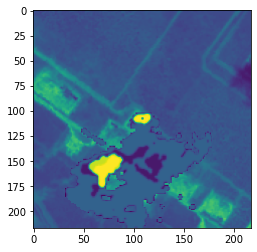

In [40]:
from PIL import Image, ImageOps

im1 = Image.open(fil)

im2 = ImageOps.grayscale(im1)

#im2.show()
plt.imshow(im2)
plt.show()

In [41]:
from matplotlib.pyplot import *
import imageio
from skimage.io import imread

((217, 217, 4), <matplotlib.image.AxesImage at 0x126daca54c0>)

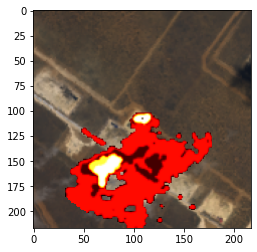

In [42]:
image = imread(fil)

image.shape, imshow(image)

In [43]:
features = np.reshape(image, (217 * 217*4))

In [44]:
features

array([ 79,  63,  52, ..., 170, 133, 255], dtype=uint8)

In [45]:
#https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v

## Grayscale pixel values as features

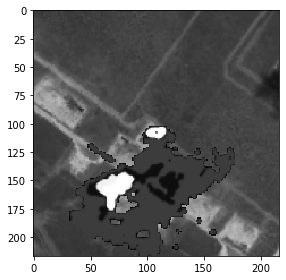

In [47]:
image = imread(fil, as_gray=True)
imshow(image)

In [48]:
#checking image shape 
image.shape, image

((217, 217),
 array([[0.25728196, 0.25364314, 0.24888824, ..., 0.2578851 , 0.24053216,
         0.23213843],
        [0.2603702 , 0.25644863, 0.24917098, ..., 0.2408149 , 0.22849961,
         0.22766627],
        [0.2603702 , 0.25114314, 0.23994392, ..., 0.23606   , 0.22766627,
         0.22849961],
        ...,
        [0.28087882, 0.30552431, 0.32513216, ..., 0.58964   , 0.69914627,
         0.71062824],
        [0.27358627, 0.28955529, 0.30160275, ..., 0.67197804, 0.7097949 ,
         0.69886353],
        [0.27049804, 0.27441961, 0.27779059, ..., 0.74563961, 0.70615608,
         0.67787176]]))

In [49]:
#pixel features

features = np.reshape(image, (217*217))

features.shape, features

((47089,),
 array([0.25728196, 0.25364314, 0.24888824, ..., 0.74563961, 0.70615608,
        0.67787176]))

## Mean pixel values of channels

In [50]:
image2 = imread(fil)
image2.shape

(217, 217, 4)

In [51]:
feature_matrix = np.zeros((217,217)) 
feature_matrix.shape

(217, 217)

In [52]:
for i in range(0,image2.shape[0]):
    for j in range(0,image2.shape[1]):
        feature_matrix[i][j] = ((int(image2[i,j,0]) + int(image2[i,j,1]) + int(image2[i,j,2]))/3)

In [53]:
features = np.reshape(feature_matrix, (217*217)) 
features.shape

(47089,)

In [54]:
features

array([ 64.66666667,  64.        ,  62.66666667, ..., 183.33333333,
       173.66666667, 166.33333333])

### Using ChtGPT code - exploring alpha channel

In [55]:
# Split image into channels
b, g, r, a = cv2.split(image2)

# Print the shape of each channel
print("Blue channel shape:", b.shape)
print("Green channel shape:", g.shape)
print("Red channel shape:", r.shape)
print("Alpha channel shape:", a.shape)

Blue channel shape: (217, 217)
Green channel shape: (217, 217)
Red channel shape: (217, 217)
Alpha channel shape: (217, 217)


In [56]:
b

array([[ 79,  78,  76, ...,  75,  69,  66],
       [ 79,  78,  76, ...,  69,  65,  64],
       [ 79,  75,  72, ...,  67,  64,  65],
       ...,
       [ 79,  86,  91, ..., 174, 203, 206],
       [ 78,  82,  85, ..., 196, 205, 203],
       [ 78,  79,  79, ..., 215, 204, 196]], dtype=uint8)

In [ ]:
g

In [ ]:
r

In [ ]:
a

In [ ]:
mean = np.mean(a)
mean

## Extracting Edge Features

In [ ]:
#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

In [ ]:
imshow(image)

### Testing CNN model

In [23]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'figure.max_open_warning': 0})
from matplotlib.pyplot import *
import imageio
from skimage.io import imread

from tqdm import tqdm

import cv2   #For image processing

import tensorflow as tf
#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model



from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv, rgba2rgb
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu
from skimage import io, color

In [ ]:
fil

In [ ]:
im2

In [2]:
fil = "C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train/ang20190922t192642_ang20190922t192642-2_r4578_c217-plume.png"

In [3]:
#im1=imread(fil)
#img = imread(fil)

In [4]:
with open(fil, 'rb') as f:
    im1 = f.read()

In [5]:
#Read the numpy arrays as color images in OpenCV
im1_data = np.frombuffer(im1, dtype='uint8')
image_bgr2 = cv2.imdecode(im1_data, cv2.IMREAD_COLOR)

In [6]:
#Convert to HSV for creating a mask
image_hsv = cv2.cvtColor(image_bgr2, cv2.COLOR_BGR2HSV)
#im2_rgb = color.rgba2rgb(img)
#im2_hsv = rgb2hsv(im2_rgb)

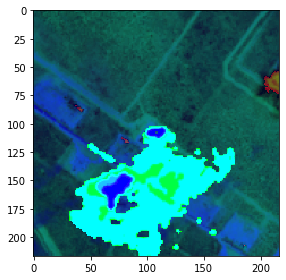

In [24]:
imshow(image_hsv)

In [8]:
#Convert to grayscale that will actually be used for training, instead of color image 
image_gray = cv2.cvtColor(image_bgr2, cv2.COLOR_BGR2GRAY)

In [10]:
mask = cv2.inRange(image_hsv, (0,255,255), (0,255,255))

C:\Users\vasan\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


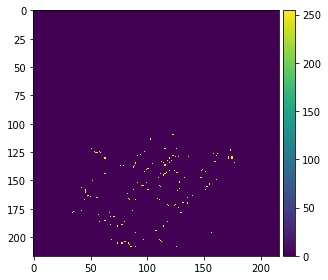

In [25]:
imshow(mask)

In [12]:
#Get the coordinates of the red rectangle in the image, 
#But take entire image if mask fails to detect the red rectangle
if len(np.where(mask != 0)[0]) != 0:
    y1 = min(np.where(mask != 0)[0])
    y2 = max(np.where(mask != 0)[0])
else:
    y1 = 0                                     
    y2 = len(mask)
if len(np.where(mask != 0)[1]) != 0:
    x1 = min(np.where(mask != 0)[1])
    x2 = max(np.where(mask != 0)[1])
else:
    x1 = 0
    x2 = len(mask[0])

In [13]:
image_cropped = image_gray[y1:y2, x1:x2]

In [14]:
image_150x150 = cv2.resize(image_cropped, (150, 150))

In [15]:
image_arr = image_150x150.flatten()

In [16]:
image_arr

array([143, 139, 132, ..., 121,  93,  89], dtype=uint8)

In [17]:
features.dtype

NameError: name 'features' is not defined

In [18]:
features

NameError: name 'features' is not defined

In [19]:
from PIL import Image
import numpy as np

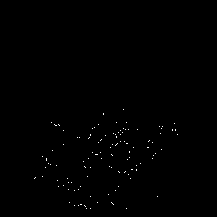

In [20]:
mask2 = Image.fromarray(mask)
mask2

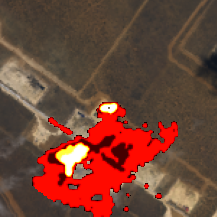

In [21]:
imOrg = Image.open(fil)
imOrg

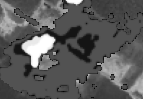

In [22]:
image_cropped2 = Image.fromarray(image_cropped)
image_cropped2